In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import torch

生成数据集

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [9]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.1485,  1.5295]) 
label: tensor([-1.2990])


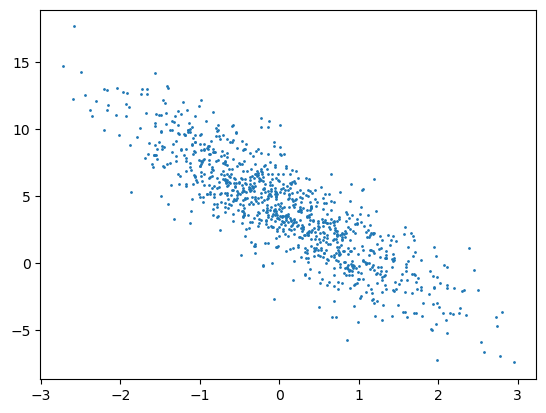

In [10]:
# detach() is used to remove the gradient from the tensor
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

读取数据集

定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签